In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')

In [8]:
# The file doesn't have header, so I have to define the column names
columns = ['user_id', 'order_dt', 'order_products', 'order_amount']
# Use read_table() to read text file. File delimiter is space.
df = pd.read_table('CDNOW_master.txt', names=columns, sep='\s+')

In [9]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


Note: the user can order multiple times in one day. E.g. user 2 have 2 orders on 19970112

In [10]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


Each order has 2.41 products by average. Std is 2.33. It shows a little volatility. The medium (50%) is 2 and 75% is 3 which means most orders have a few products each. From order_amount, we can see most orders are cheap.  

Note: The consumption data is usually long-tailed. Most customers spend a few money and a few customers spend a large amount. This is also called 2/8 (Pareto principle).

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


No null value. Very clean data.

In [12]:
df['order_date'] = pd.to_datetime(df.order_dt, format = '%Y%m%d')

In [13]:
df['month'] = df.order_date.values.astype('datetime64[M]') # change to month. Note: it will display as the 1st day of the month

In [14]:
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
order_date        69659 non-null datetime64[ns]
month             69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


In [17]:
user_grouped = df.groupby('user_id').sum()
user_grouped.head()

,order_dt,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [18]:
user_grouped.describe()

,order_dt,order_products,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


The average number of products in each order is 7.1 and is close to 75% which means some customers had ordered lots of products.

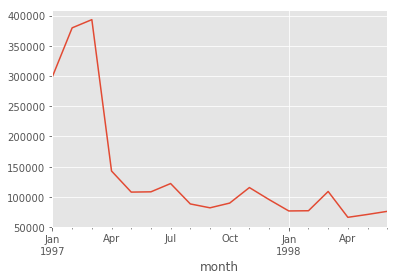

In [19]:
# Plot the total order amount by month
df.groupby('month').order_amount.sum().plot()

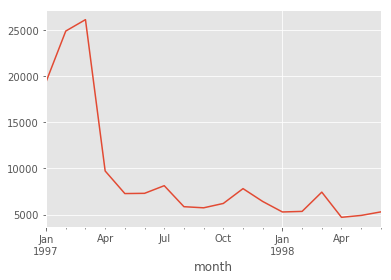

In [21]:
df.groupby('month').order_products.sum().plot()

Both order_amount and order_products show the sales had reached a peak in the first several months. This is suspicious. It could be due to outlier or promotion activity. But we only have sales data, it's hard to determine.

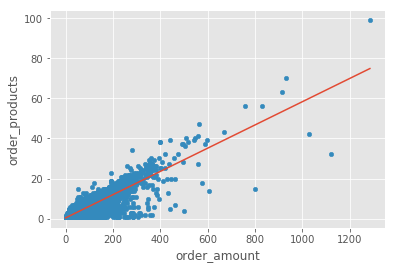

In [35]:
# Draw scatter plot for each order
ax = df.plot.scatter(x = 'order_amount',  y = 'order_products')

# Add a fitting line
x = df['order_amount']
y = df['order_products']
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

We can see the relationship between order_products and order_amount. The price of each product is around 10. Only a few order_amount are over 1000. It is probably not due to outlier.